In [419]:
from __future__ import print_function
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import argparse
import torch
from torch.utils.data import dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
#imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torchvision import datasets, transforms
from torch.autograd import Variable


In [420]:
trans=transforms.Compose([transforms.Resize((28,28)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                         ])
trainset = torchvision.datasets.ImageFolder(root=r"C:\Users\dorit\anaconda3\data\handwrite",
                                           transform=trans)

In [421]:
trainset.__getitem__(0)

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

In [422]:
len(trainset)

10

In [423]:
classes=trainset.classes
classes

['examples']

In [424]:
trainloader=DataLoader(trainset,
                      batch_size=13,
                      shuffle=False,
                      num_workers=4)

In [432]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [433]:
def imshow(img):
    img=img/2+0.5
    np_img=img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

torch.Size([10, 3, 28, 28])
(3, 92, 122)
(92, 122, 3)
torch.Size([10, 3, 28, 28])
torch.Size([3, 62, 242])
examples examples examples examples examples examples examples examples examples examples 


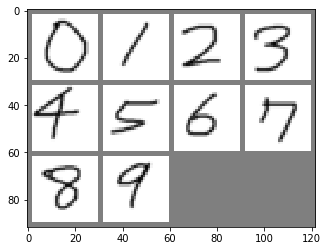

In [435]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(10)))

In [ ]:
epochs = 3 #학습 횟수
batch_size = 64 #??
test_batch_size = 1000
learning_rate = 0.01
momentum = 0.5
no_cuda = True
log_interval = 10

random_seed = 1

torch.manual_seed(random_seed)
use_cuda = not no_cuda and torch.cuda.is_available()


device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [ ]:
trans=transforms.Compose([transforms.Resize((28,28)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                         ])
trainset = torchvision.datasets.ImageFolder(root=r"C:\Users\dorit\anaconda3\data\handwrite",
                                           transform=trans)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


test_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
#model 생성

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.float()

        h1 = F.relu(self.fc1(x.view(-1, 784*3)))
        h2 = F.relu(self.fc2(h1))
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        h5 = F.relu(self.fc5(h4))
        h6 = self.fc6(h5)
        return F.log_softmax(h6, dim=1)

In [ ]:
#model 객체 선언

model = Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
#train
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)    
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item() 
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, epochs+1):
    train(epoch)
    test()

In [ ]:
#plot
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [ ]:
with torch.no_grad():
    output = model(example_data)

In [ ]:
fig = plt.figure()
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])